In [1]:
import numpy as np
import pickle
import os

import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
src_folder = "E:/DevData/rehab_exercise/shoulder_surgery/data/"
with open(src_folder+'processed.pkl', "rb") as file:
    data = pickle.load(file)

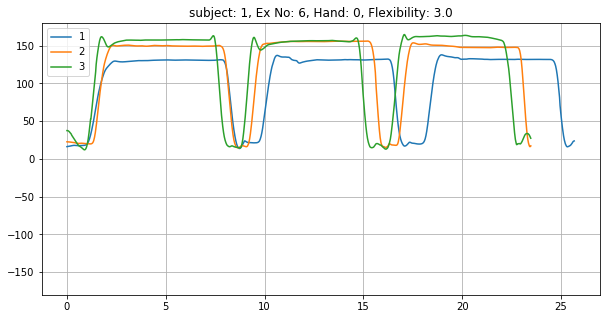

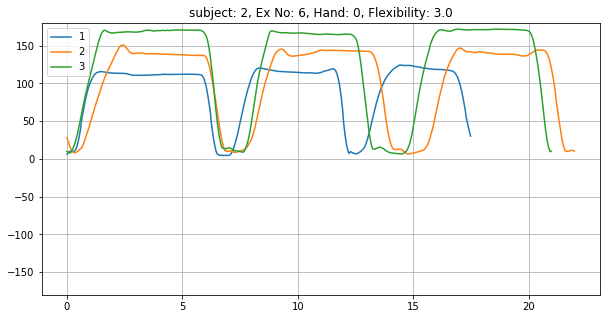

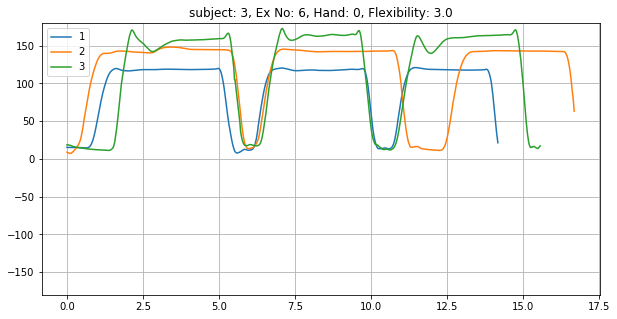

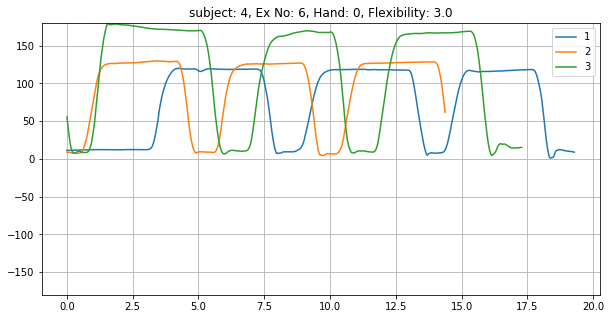

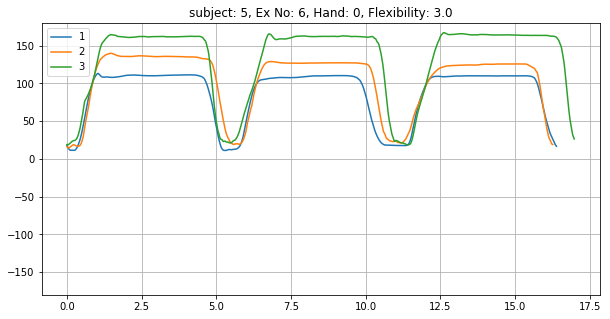

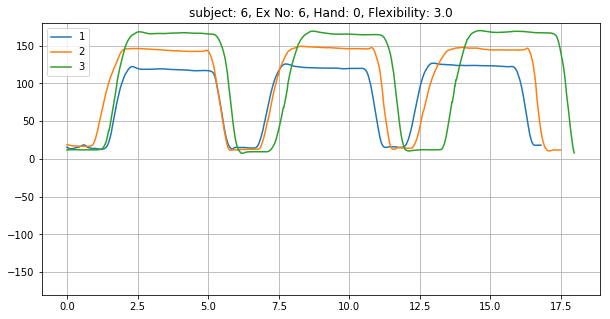

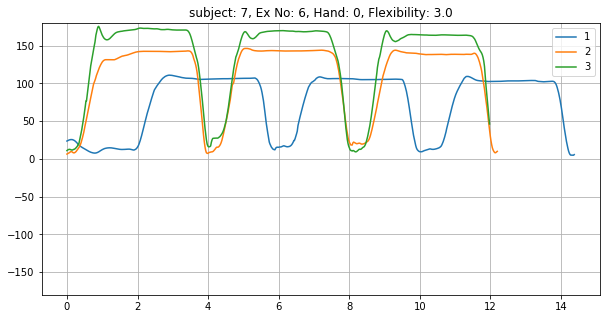

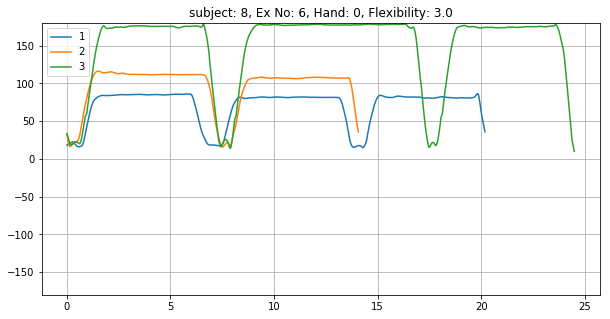

In [14]:
ex_no = 6
hand = 0 #0:right hand, 1 left hand
d = [[],[]]
a = [[],[]]

for i in range(8):
    d = data[i][hand]    
    a = data[i][2]
    if hand == 0:
        a = a[(a[:, 0]==ex_no) & (a[:, 1]!=2), :] 
    else:
        a = a[(a[:, 0]==ex_no) & (a[:, 1]>=2), :]
    
    fig = plt.figure(figsize=(10,5))
    subplot = fig.add_subplot(111)
    plt.ylim([-180, 180])
    plt.grid()
    
    for j in range(len(a)):
        t1 = a[j, -2]
        t2 = a[j, -1]
        flex = a[j, -3]
        ds = d[(d[:, 0]>=t1) & (d[:,0]<=t2), :]
        
        t = ds[:, 0] - ds[0, 0]
        x = np.arccos(ds[:, -3])*180/np.pi
        y = np.arccos(ds[:, -2])*180/np.pi
        z = np.arccos(ds[:, -1])*180/np.pi
        
        #x = ds[:, 1]
        #y = ds[:, 2]
        #z = ds[:, 3]
               
        subplot.plot(t, x, label=str(j+1))
        #subplot.plot(ds[:, 0], y, label='AY')
        #subplot.plot(ds[:, 0], z, label='AZ')
               
        #subplot.plot(ds[:, 0], ds[:, 7], label='GX')
        #subplot.plot(ds[:, 0], ds[:, 8], label='GY')
        #subplot.plot(ds[:, 0], ds[:, 9], label='GZ')
    plt.title('subject: '+str(i+1)+', Ex No: '+str(ex_no)+', Hand: '+str(hand)+', Flexibility: '+str(flex))
    plt.legend()
